# NASA Astronauts, 1959-Present

## Which American Astronaut has spent the most time in space?

## 1. Prepare Data
 - Alma Mater : 모교 (졸업학교인듯)
 - Undergraduate Major : 학부 전공
 - Graduate Major : 대학원 전공
 - Military Rank : 군 계급
 - Military Branch : 군 분류 
 - Space Flights : 우주 비행 횟수
 - Space Flight (hr) : 우주 비행 총 시간
 - Space Walks : 비행선 밖에서의 임무 수행 횟수 인듯
 - Space Walks (hr) : 비행선 밖에서의 임무 수행 시간

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib.pyplot import pie

In [77]:
%matplotlib inline

In [78]:
df = pd.read_csv("astronauts.csv")
df.head(3)

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004.0,19.0,Active,5/17/1967,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaN,NaN
1,Loren W. Acton,NaN,NaN,Retired,3/7/1936,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaN,NaN
2,James C. Adamson,1984.0,10.0,Retired,3/3/1946,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaN,NaN


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 19 columns):
Name                   357 non-null object
Year                   330 non-null float64
Group                  330 non-null float64
Status                 357 non-null object
Birth Date             357 non-null object
Birth Place            357 non-null object
Gender                 357 non-null object
Alma Mater             356 non-null object
Undergraduate Major    335 non-null object
Graduate Major         298 non-null object
Military Rank          207 non-null object
Military Branch        211 non-null object
Space Flights          357 non-null int64
Space Flight (hr)      357 non-null int64
Space Walks            357 non-null int64
Space Walks (hr)       357 non-null float64
Missions               334 non-null object
Death Date             52 non-null object
Death Mission          16 non-null object
dtypes: float64(3), int64(3), object(13)
memory usage: 34.9+ KB


## 2. Changing Data Type 

In [80]:
df['Year'] = df['Year'].astype(object)
df['Group'] = df['Group'].fillna(0)
df['Group'] = df['Group'].astype(int)
df['Group'] = df['Group'].astype(object)
df['Birth Date'] = pd.to_datetime(df['Birth Date'], format='%m/%d/%Y')

In [81]:
df[df['Death Date'].notnull()]['Death Date'] # strange Date

10       2/1/2003
14      8/25/2012
24      2/28/1966
36      7/23/2006
42       2/1/2003
46      8/11/2008
51      10/3/2009
58       4/5/1991
63      1/27/1967
67       2/1/2003
70       2/1/2003
78       7/8/1999
79      10/4/2004
98      12/2/1987
102      4/6/1990
116    10/31/1964
129      6/6/1967
139     6/17/1989
140     1/27/1967
154     10/5/1993
170      2/1/2003
171      8/8/1991
173     1/28/1986
192     8/26/2012
205      3/1/2011
209     3/15/2008
219     1/28/1986
222      2/1/2003
226     1/28/1986
246     7/28/2011
250     1/28/1986
252     3/22/1996
255      5/9/2008
264      7/1/2012
271     1/28/1986
274     7/23/2012
275     5/24/2001
278    12/12/1994
281      04/23/01
284      5/2/2007
287     1/28/1986
293     2/28/1966
297     7/21/1998
300     6/13/1993
301     1/28/1986
312    12/27/1982
318     5/24/1986
327     10/3/1995
330      2/6/2012
333     4/23/2001
341     1/27/1967
344     10/5/1967
Name: Death Date, dtype: object

In [82]:
df.ix[281,'Death Date'] = df.ix[281,'Death Date'][:6] + "20" + df.ix[281,'Death Date'][6:]

In [83]:
df['Death Date'] = pd.to_datetime(df['Death Date'], format='%m/%d/%Y')

In [84]:
df.head()

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Joseph M. Acaba,2004,19,Active,1967-05-17,"Inglewood, CA",Male,University of California-Santa Barbara; Univer...,Geology,Geology,NaN,NaN,2,3307,2,13.0,"STS-119 (Discovery), ISS-31/32 (Soyuz)",NaT,NaN
1,Loren W. Acton,NaN,0,Retired,1936-03-07,"Lewiston, MT",Male,Montana State University; University of Colorado,Engineering Physics,Solar Physics,NaN,NaN,1,190,0,0.0,STS 51-F (Challenger),NaT,NaN
2,James C. Adamson,1984,10,Retired,1946-03-03,"Warsaw, NY",Male,US Military Academy; Princeton University,Engineering,Aerospace Engineering,Colonel,US Army (Retired),2,334,0,0.0,"STS-28 (Columbia), STS-43 (Atlantis)",NaT,NaN
3,Thomas D. Akers,1987,12,Retired,1951-05-20,"St. Louis, MO",Male,University of Missouri-Rolla,Applied Mathematics,Applied Mathematics,Colonel,US Air Force (Retired),4,814,4,29.0,"STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...",NaT,NaN
4,Buzz Aldrin,1963,3,Retired,1930-01-20,"Montclair, NJ",Male,US Military Academy; MIT,Mechanical Engineering,Astronautics,Colonel,US Air Force (Retired),2,289,2,8.0,"Gemini 12, Apollo 11",NaT,NaN


## 3. Explore data
 - 수치형 데이터 통계값 가지고오기. 
 1. 우주 비행 횟수
 2. 우주 비행 시간
 3. 우주 비행선 밖에서의 임무 횟수 
 4. 우주 비행선 밖에서의 임무 수행 시간

In [85]:
df.describe() 

,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr)
count,357.000000,357.000000,357.000000,357.000000
mean,2.364146,1249.266106,1.246499,7.707283
std,1.428700,1896.759857,2.056989,13.367973
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,289.000000,0.000000,0.000000
50%,2.000000,590.000000,0.000000,0.000000
75%,3.000000,1045.000000,2.000000,12.000000
max,7.000000,12818.000000,10.000000,67.000000


### 3.0 남녀 성비 

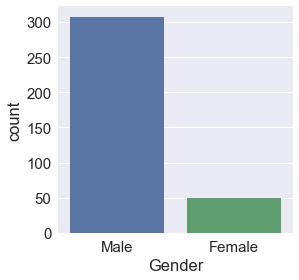

In [86]:
sns.factorplot('Gender',kind='count',data=df) # 남자가 비교되 안되게 많다. 

In [87]:
df[df['Gender']=='Female'].groupby(['Undergraduate Major']).size().sort_values(ascending=False)[:5]

Undergraduate Major
Physics                     5
Chemistry                   5
Aeronautical Engineering    3
Electrical Engineering      3
Aerospace Engineering       3
dtype: int64

### 3.1 우주 비행 횟수 / 시간

 - 비행 횟수
  - 최대 7, 최소 0
  - 평균 2
  - 1~3회 정도 분포가 보인다. 

In [88]:
df[df['Space Flights']==7] # 가장 많이 우주 비행을 한 비행사.

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
65,Franklin R. Chang-Diaz,1980,9,Retired,1950-04-05,"San Jose, Costa Rica",Male,University of Connecticut; MIT,Mechanical Engineering,Applied Plasma Physics,NaN,NaN,7,1602,3,19.0,"STS 61-C (Columbia), STS-34 (Atlantis), STS-46...",NaT,NaN
279,Jerry L. Ross,1980,9,Retired,1948-01-20,"Crown Point, IN",Male,Purdue University,Mechanical Engineering,Mechanical Engineering,Colonel,US Air Force (Retired),7,1393,9,58.0,"ST 61-B (Atlantis), ST-27 (Atlantis), ST-37 (A...",NaT,NaN


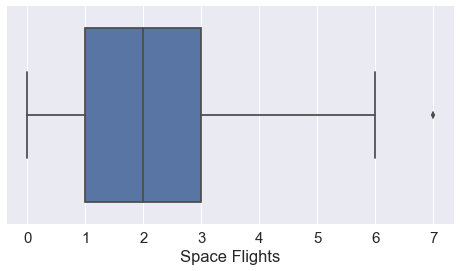

In [89]:
plt.figure(figsize=(8,4))
sns.boxplot(df['Space Flights'])

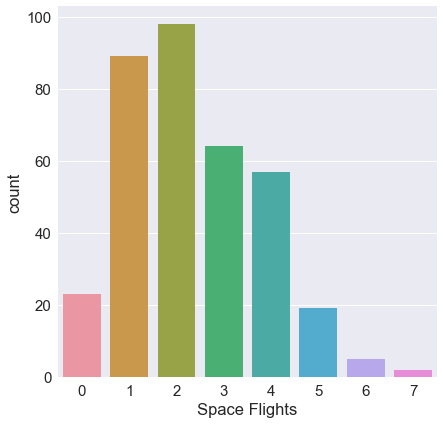

In [90]:
sns.factorplot('Space Flights',kind='count',data=df, size=6)

 - 비행시간
  - 시간이다보니 다양한 시간이 있다. 
  - 평균 : 590시간
  - 최대 : 12818시간 

In [91]:
df[df['Space Flight (hr)']==12818]

,Name,Year,Group,Status,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,Graduate Major,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
346,Jeffrey N. Williams,1996,16,Active,1958-01-18,"Superior, WI",Male,US Military Academy; US Naval Postgraduate Sch...,Applied Science & Engineering,Aeronautical Engineering; National Security & ...,Colonel,US Army (Retired),4,12818,5,32.0,"STS-101 (Atlantis), ISS-13 (Soyuz), ISS-21/22 ...",NaT,NaN


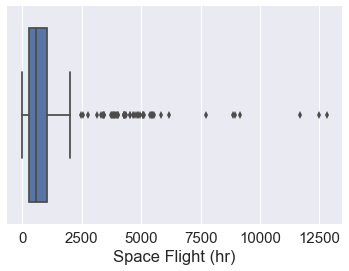

In [92]:
sns.boxplot(df['Space Flight (hr)']) # 오른쪽 꼬리

C:\ProgramData\Anaconda3\envs\work\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


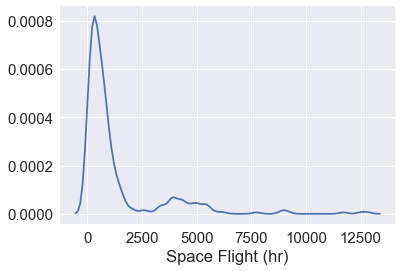

In [93]:
sns.distplot(df['Space Flight (hr)'], hist=False)

### 3.1.2 평균 비행 시간 

In [94]:
Temp_df = df[["Space Flights","Space Flight (hr)"]]

In [95]:
def getAvg(x):
    if x[0] != 0:
        return x[1]/x[0]
    else:
        return 0

In [96]:
Temp_df['Ave Flights'] = Temp_df.apply(lambda x:getAvg(x), axis=1)

C:\ProgramData\Anaconda3\envs\work\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


C:\ProgramData\Anaconda3\envs\work\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


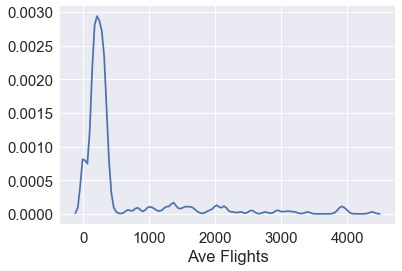

In [97]:
sns.distplot(Temp_df['Ave Flights'], hist=False)

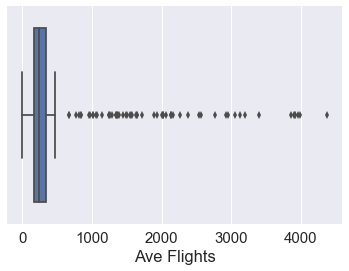

In [98]:
sns.boxplot(Temp_df['Ave Flights']) # 오른쪽 꼬리

In [99]:
order = df.sort_values(by='Space Flight (hr)',ascending=False).head(20).index

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

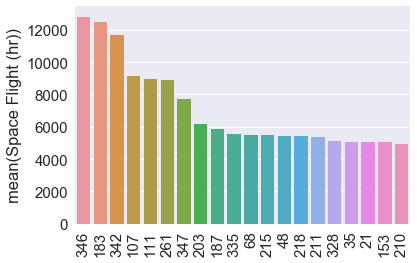

In [100]:
sns.barplot(y='Space Flight (hr)',x=df.sort_values(by='Space Flight (hr)',ascending=False).head(20).index ,data=df.sort_values(by='Space Flight (hr)',ascending=False).head(20), order=order)
plt.xticks(rotation=90)

### 과연 우주 비행 횟수와 밖에서 임무 수행 한 횟수가 관계가 있을까?

In [101]:
df.columns

Index(['Name', 'Year', 'Group', 'Status', 'Birth Date', 'Birth Place',
       'Gender', 'Alma Mater', 'Undergraduate Major', 'Graduate Major',
       'Military Rank', 'Military Branch', 'Space Flights',
       'Space Flight (hr)', 'Space Walks', 'Space Walks (hr)', 'Missions',
       'Death Date', 'Death Mission'],
      dtype='object')

In [102]:
df[['Space Flights','Space Walks']].corr() # 0.25 그렇게 큰 상관관계가 있지는 않은걸로 판단 된다. 

,Space Flights,Space Walks
Space Flights,1.000000,0.257073
Space Walks,0.257073,1.000000


### 3.2 언제 가장 많이 비행사를 뽑았을까? ( 시작했을까? )

In [103]:
count_df = pd.DataFrame({'cnt':df['Year'].value_counts()}).reset_index()
count_df.columns = ['Year','Cnt']
count_df['Year'] =  count_df['Year'].astype(np.int)
count_df

,Year,Cnt
0,1978,35
1,1996,35
2,1998,25
3,1990,23
4,1980,19
5,1992,19
6,1966,19
7,1995,19
8,1984,18
9,2000,17


 - 1978 / 1996년이 가장 많은 우주비행사를 뽑았다. 왜???

#### 1978 년
![img1](img/1.PNG)

#### 1996 년
![img1](img/2.PNG)

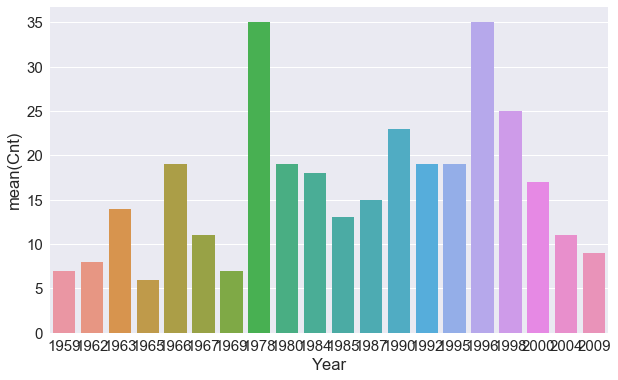

In [104]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Year', y='Cnt', data=count_df, ax=ax)

### 3.3 어느 대학에 나온사람이 많은가?
 - 그냥 그림그리기에는 대학의 종류가 너무 많다. 

In [105]:
len(df['Alma Mater'].value_counts()) #  280개의 대학교. 최고 10개 대학을 뽑자.

280

In [106]:
university_count = pd.DataFrame({'Cnt':df['Alma Mater'].value_counts()}).reset_index()
university_count = university_count.rename(columns={'index': 'Univ_Name'})
university_count.sort_values(by='Cnt',ascending=True)
university_count.head()

,Univ_Name,Cnt
0,US Naval Academy,12
1,US Naval Academy; US Naval Postgraduate School,11
2,Purdue University,7
3,US Air Force Academy; Purdue University,7
4,US Naval Academy; MIT,5


(array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.]),
 <a list of 8 Text xticklabel objects>)

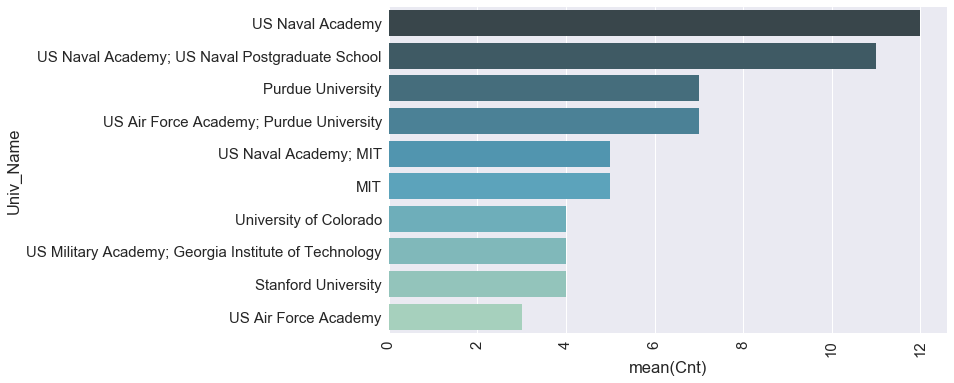

In [107]:
_, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=university_count.head(10), x='Cnt',y='Univ_Name',ax=ax,palette='GnBu_d')
plt.xticks(rotation=90)

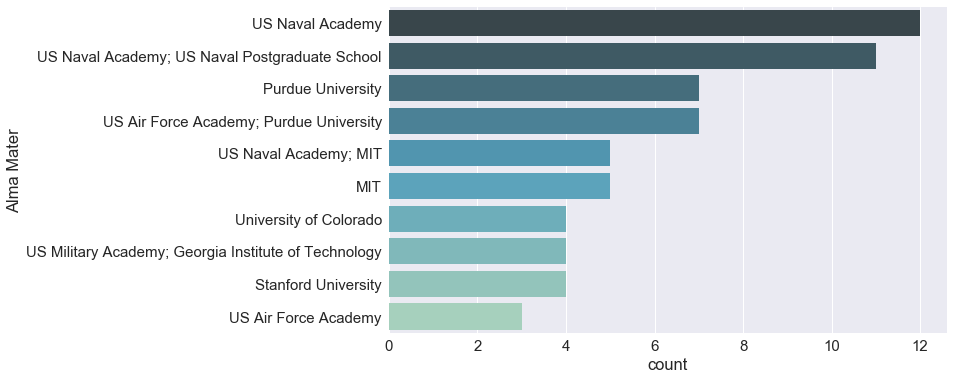

In [108]:
countCollege = df['Alma Mater'].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(y='Alma Mater', data=df, order=countCollege.nlargest(10).index, palette='GnBu_d')

### 3.4 학부 vs 대학원  

In [109]:
df['GoToGraduate'] = df['Graduate Major'].apply(lambda x: 1 if type(x)==str else 0)

In [110]:
df['GoToGraduate'] = df['GoToGraduate'].map({0:"Under",1:'Gradu'})

In [111]:
df['GoToGraduate'].value_counts()

Gradu    298
Under     59
Name: GoToGraduate, dtype: int64

In [112]:
GraduCount = df['GoToGraduate'].value_counts()

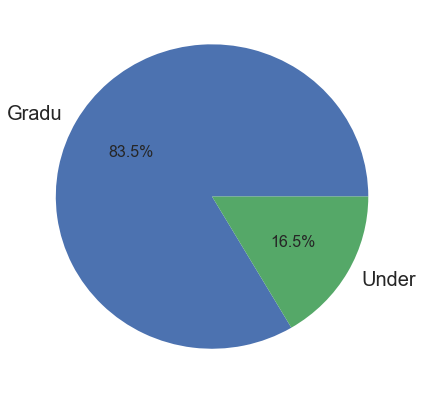

In [113]:
plt.figure(figsize=(7,7))
plt.rcParams['font.size'] = 16
patches, texts, autotexts = pie(GraduCount,labels = GraduCount.index, autopct='%1.1f%%' )
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)

### 3.4.1 대학원 졸업생 중 어느 전공이 많을까?
 - 2개 이상의 전공을 가진 사람도 꽤 있다.

In [114]:
Gradu_df = df[df['GoToGraduate']=="Gradu"].reset_index()  # 대학원생 졸업.
del Gradu_df['index']
Gradu_df['Major_Cnt'] = Gradu_df['Graduate Major'].apply(lambda x:len(x.split(";")))

In [115]:
Gradu_df['Major_Cnt'].value_counts()

1    228
2     61
3      5
4      4
Name: Major_Cnt, dtype: int64

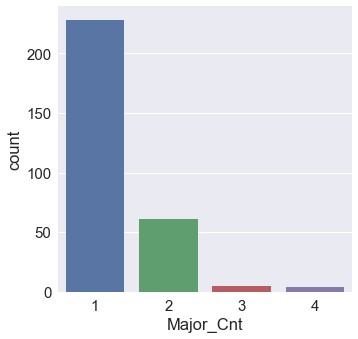

In [116]:
sns.factorplot('Major_Cnt',kind='count',data=Gradu_df, size=5)

In [117]:
 Major_list =  Gradu_df['Graduate Major'].str.split(";")

In [118]:
major_tmp = pd.DataFrame(Major_list.values.tolist()).reset_index()
major_tmp.columns = ['Stu_index','First','Second','Third', 'Fourth']
major_tmp = pd.melt(major_tmp,id_vars=['Stu_index'])
del major_tmp['variable']
major_tmp = major_tmp[major_tmp['value'].notnull()]

In [119]:
major_val_cnt = pd.DataFrame({'cnt':major_tmp['value'].value_counts()})
major_val_cnt.head()

,cnt
Aeronautical Engineering,31
Aerospace Engineering,26
Medicine,19
Physics,18
Mechanical Engineering,17


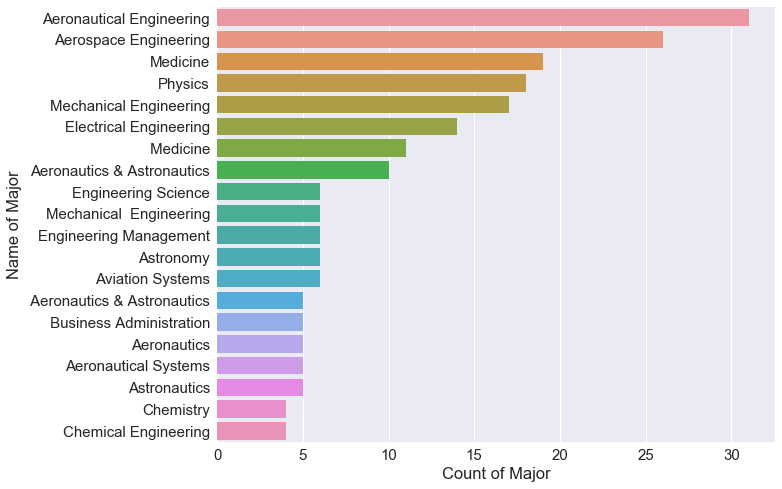

In [120]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.barplot(y=major_val_cnt.head(20).index,x='cnt',data=major_val_cnt.head(20))
plt.xlabel("Count of Major")
plt.ylabel("Name of Major")

In [121]:
major_tmp['Engineering'] = major_tmp['value'].apply(lambda x:1 if 'Engineering' in x else 0)
major_tmp['Engineering'] = major_tmp['Engineering'].map({0:'Not Engineering',1:'Engineering'})

In [122]:
Engineering_Count = major_tmp['Engineering'].value_counts()
Engineering_Count

Not Engineering    217
Engineering        164
Name: Engineering, dtype: int64

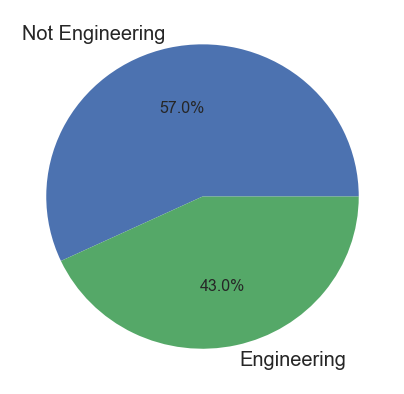

In [123]:
plt.figure(figsize=(7,7))
plt.rcParams['font.size'] = 16
patches, texts, autotexts = pie(Engineering_Count,labels = Engineering_Count.index, autopct='%1.1f%%' )
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)

### 3.5 현재 상태. 

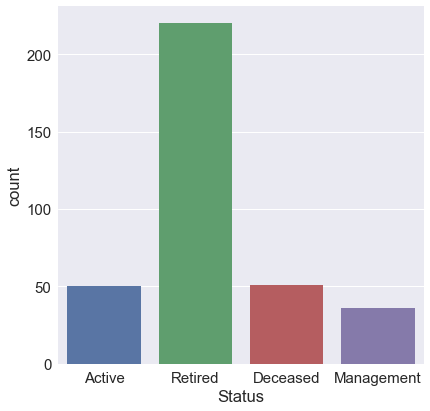

In [124]:
sns.factorplot('Status',kind='count',data=df,size=6)

### 3.6 Group 상태 

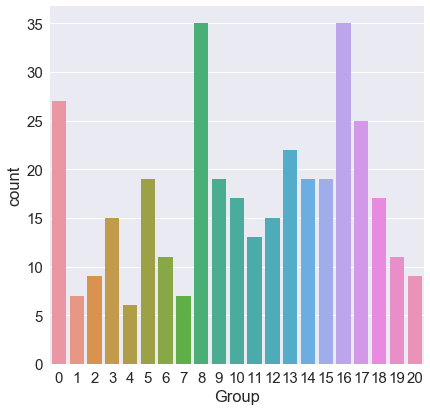

In [125]:
sns.factorplot('Group',kind='count',data=df,size=6)

### 3.7 군대 

#### 3.7.1 군 참여 여부 

In [126]:
df['Military'] = df['Military Branch'].apply(lambda x: 1 if type(x) == str else 0)
df['Military'] = df['Military'].map({0:'Non Army',1:'Army'})

In [127]:
Mili_count = df['Military'].value_counts()
Mili_count

Army        211
Non Army    146
Name: Military, dtype: int64

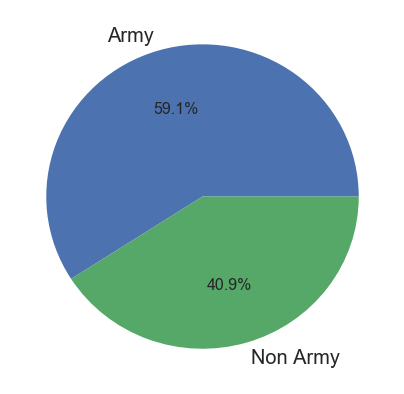

In [128]:
plt.figure(figsize=(7,7))
plt.rcParams['font.size'] = 16
patches, texts, autotexts = pie(Mili_count,labels = Mili_count.index, autopct='%1.1f%%' )
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)

#### 3.7.2 군 구분 Count

In [129]:
df['Military_Branch'] = df['Military Branch'].str.replace(' \(Retired\)',"").str.strip()

In [130]:
Branch_cnt = df[df['Military_Branch'].notnull()]['Military_Branch'].value_counts()

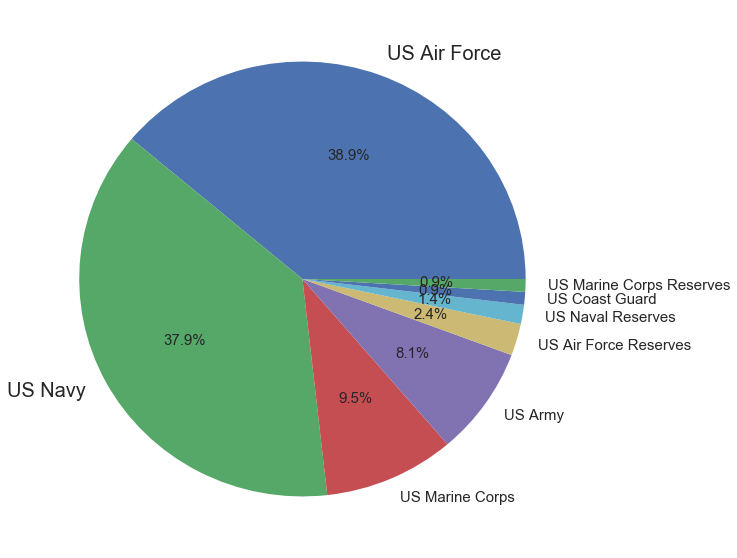

In [131]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 15
patches, texts, autotexts = pie(Branch_cnt,labels = Branch_cnt.index, autopct='%1.1f%%' )
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)

#### 3.7.3 군 계급 

In [132]:
Mili_Rank_Count = df['Military Rank'].value_counts()

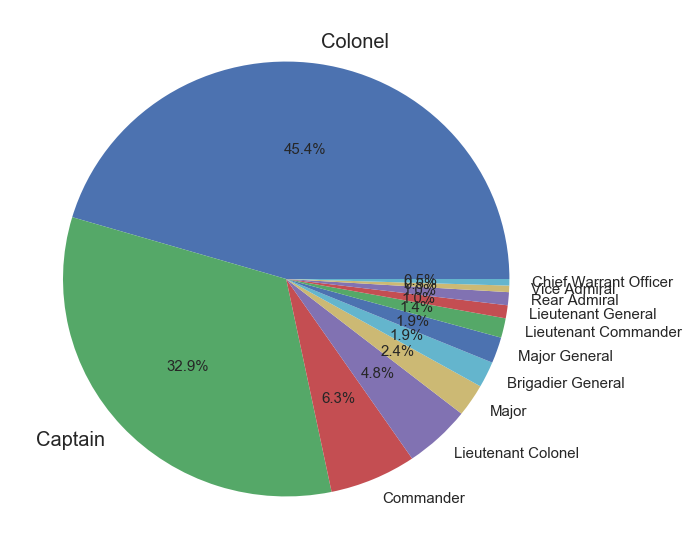

In [133]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 15
patches, texts, autotexts = pie(Mili_Rank_Count,labels = Mili_Rank_Count.index, autopct='%1.1f%%' )
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)

 - colonel : 대령(육군)
 - captain : 대령(해군 / 해안경비대)
 - commander : 중령 ( 해군 / 해안경비대)
 - Lieutenant Colonel : 중령 (육군)
 - General 류 : 소령

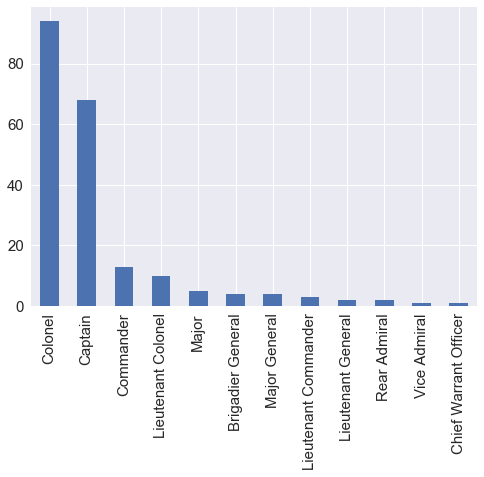

In [134]:
Mili_Rank_Count.plot(kind='bar')

### 3.8 태어난 지역 

In [135]:
df['Birth Place'].head()

0    Inglewood, CA
1     Lewiston, MT
2       Warsaw, NY
3    St. Louis, MO
4    Montclair, NJ
Name: Birth Place, dtype: object

In [136]:
def getPlace(x):
    tmp_string = str.split(x,",")
    if len(tmp_string) > 1:
        return tmp_string[1]
    else:
        return tmp_string[0]

In [137]:
df['Born_State'] = df['Birth Place'].apply(lambda x:getPlace(x))

In [138]:
Born_count = df['Born_State'].value_counts()

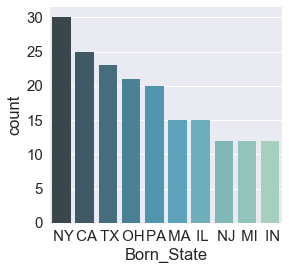

In [139]:
sns.factorplot('Born_State',kind='count',data=df, order=Born_count.nlargest(10).index, palette='GnBu_d')

### 3.9 Death Mission (참사가 일어난 현장)

In [140]:
DeathMission = df[df['Death Mission'].notnull()]['Death Mission'].value_counts()

In [141]:
DeathMission

STS 51-L (Challenger)    7
STS-107 (Columbia)       6
Apollo 1                 3
Name: Death Mission, dtype: int64

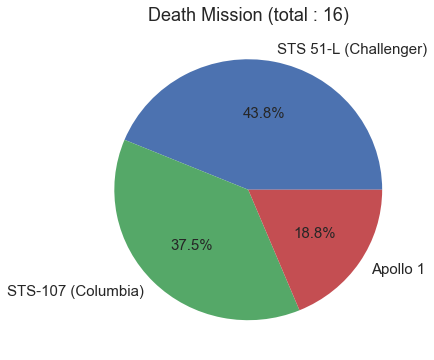

In [142]:
plt.figure(figsize=(6,6))
plt.rcParams['font.size'] = 15
patches, texts, autotexts = pie(DeathMission,labels = DeathMission.index, autopct='%1.1f%%' )
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)
plt.title("Death Mission (total : 16)")

### 3.10 Missions
 - 최대 6번 까지 Mission을 했다. 

In [144]:
df['Missions'] = df['Missions'].replace(np.nan, 0)

In [69]:
#Mission_list = df[df['Missions'].notnull()]['Missions'].str.split(',')

In [145]:
df['Missions']

0                 STS-119 (Discovery), ISS-31/32 (Soyuz)
1                                  STS 51-F (Challenger)
2                   STS-28 (Columbia), STS-43 (Atlantis)
3      STS-41 (Discovery), STS-49 (Endeavor), STS-61 ...
4                                   Gemini 12, Apollo 11
5      STS-46 (Atlantis), STS-62 (Columbia), STS-75 (...
6                  ST-5 (Columbia), STS 51-A (Discovery)
7      STS-90 (Columbia), STS-106 (Atlantis), STS-109...
8                                               Apollo 8
9      STS-117/120 (Atlantis/Discovery), STS-131 (Dis...
10                 STS-89 (Endeavor), STS-107 (Columbia)
11               STS-119 (Discovery), STS-132 (Atlantis)
12     STS-37 (Atlantis), STS-47 (Endeavor), STS-59 (...
13               STS-117 (Atlantis), STS-119 (Discovery)
14                                   Gemini 8, Apollo 11
15                                   STS-119 (Discovery)
16     STS-93 (Columbia), STS-100 (Endeavor), STS-112...
17                             

In [146]:
df.iloc[17]['Missions']

0

In [147]:
def getMissionCnt(x):
    if x == 0:
        return 0 
    else:
        return len(x.split(','))

In [149]:
df['Mission_cnt'] = df['Missions'].apply(lambda x:getMissionCnt(x))

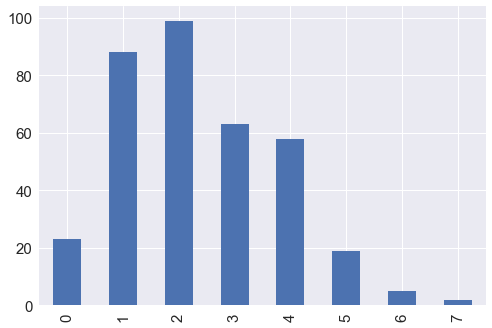

In [157]:
df['Mission_cnt'].value_counts().sort_index().plot(kind='bar')

In [75]:
Mission_df = pd.DataFrame(Mission_list.values.tolist()).reset_index()
Mission_df.head()

,index,0,1,2,3,4,5,6
0,0,STS-119 (Discovery),ISS-31/32 (Soyuz),None,None,None,None,None
1,1,STS 51-F (Challenger),None,None,None,None,None,None
2,2,STS-28 (Columbia),STS-43 (Atlantis),None,None,None,None,None
3,3,STS-41 (Discovery),STS-49 (Endeavor),STS-61 (Endeavor),STS-79 (Atlantis),None,None,None
4,4,Gemini 12,Apollo 11,None,None,None,None,None


In [166]:
Mission_melt_df = pd.melt(Mission_df,id_vars=['index'])
del Mission_melt_df['variable']

Mission_melt_df = Mission_melt_df[Mission_melt_df['value'].notnull()].reset_index()
del Mission_melt_df['level_0']

In [172]:
len(Mission_melt_df['value'].unique()) # 382 개 미션.

382

In [180]:
#sns.factorplot('value',kind='count',data=Mission_melt_df,order=Mission_melt_df['value'].value_counts().nlargest(10).index, size=8)
#plt.xticks(rotation=90)

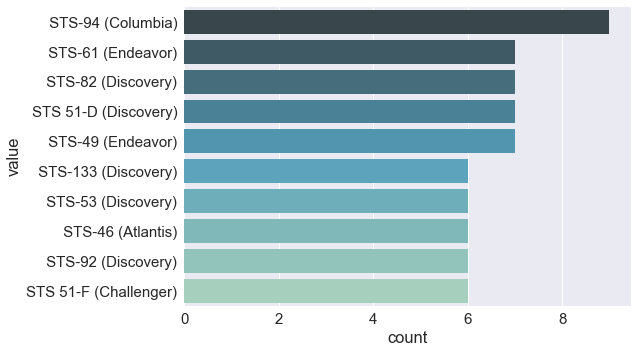

In [181]:
sns.countplot(y='value', data=Mission_melt_df, order=Mission_melt_df['value'].value_counts().nlargest(10).index, palette='GnBu_d')

#### 3.10.1 가장 많이 비행했던 우주비행선 

In [205]:
def getSpaceShip(x):
    space_shit = re.compile("\(([\w\d\-]+)\)")
    SpaceShip = space_shit.findall(x)
    if len(SpaceShip) > 0:
        return SpaceShip[0]
    else:
        return x

In [206]:
Mission_melt_df['value'].apply(lambda x:getSpaceShip(x))

0                             Discovery
1                            Challenger
2                              Columbia
3                             Discovery
4                             Gemini 12
5                              Atlantis
6                              Columbia
7                              Columbia
8                              Apollo 8
9      STS-117/120 (Atlantis/Discovery)
10                             Endeavor
11                            Discovery
12                             Atlantis
13                             Atlantis
14                             Gemini 8
15                            Discovery
16                             Columbia
17                             Columbia
18                            Discovery
19                             Atlantis
20                             Atlantis
21                                Soyuz
22                             Endeavor
23                           Challenger
24                           Challenger
